## Homework 4: Linear models

In this homework you will get more practice in combining data from different sources and in fitting a linear regression model in order to understand the relationship betweem various properties of words and the speed with which people can recognize them.

We will be using the files `ldt_trials.csv` and `word_properties.csv` in the `data` folder. These files contain lexical decision reaction times for each participant and each word (`ldt_trials.csv`) and information about various word properties such as word length, word frequency, concreteness and emotional valence (`word_properties.csv`). These data were obtained from the English Lexicon Project: https://elexicon.wustl.edu/index.html

Your main goal for this homework is to understand how reaction times to recognize a word vary as a function of each of these word properties.

#### Part 1: Loading and organizing the data

Since the reaction times and the word properties are stored in different files, you will have to load them separately, then combine them before analyzing the data. The `ldt_trials.csv` file is in tidy format and each row contains RTs in response to a particular word for a particular participants. The `word_properties.csv` file contains one row per word listing its various properties in columns.

First, load the two datasets. Use the `str`, `heads` and `summary` commands for each dataset in order to understand how they are structured:

In [45]:
ldt_trials <- read.csv("/Users/Lia/Documents/Lia/Universität/Master (Zürich) ab HS 19/Psychologie/4. Semester/Data Science for Psychologists/DataSciencePsychUZH/Homeworks/data/ldt_trials.csv.txt",header = TRUE)
word_properties <- read.csv("/Users/Lia/Documents/Lia/Universität/Master (Zürich) ab HS 19/Psychologie/4. Semester/Data Science for Psychologists/DataSciencePsychUZH/Homeworks/data/word_properties.csv.txt",header = TRUE)


In [46]:
str(ldt_trials)
head(ldt_trials)
summary(ldt_trials)

'data.frame':	333970 obs. of  8 variables:
 $ Sub_ID    : int  85 85 85 85 85 85 85 85 85 85 ...
 $ Trial     : int  83 84 85 86 87 88 89 90 91 92 ...
 $ Type      : int  0 1 1 1 1 1 1 0 0 0 ...
 $ D_Accuracy: int  1 1 1 1 1 0 1 1 1 0 ...
 $ D_RT      : int  796 1056 541 1215 587 1072 677 1109 2014 1361 ...
 $ D_word    : Factor w/ 80962 levels "a","aah","aal",..: 54285 34192 33191 43038 63606 321 10135 20126 75562 16441 ...
 $ Outlier   : int  0 0 0 0 0 0 0 0 1 0 ...
 $ D_Zscore  : num  0.0531 0.9732 -0.8494 1.5359 -0.6866 ...


,Sub_ID,Trial,Type,D_Accuracy,D_RT,D_word,Outlier,D_Zscore
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>
1,85,83,0,1,796,pisect,0,0.053086
2,85,84,1,1,1056,hindquarters,0,0.973239
3,85,85,1,1,541,healthy,0,-0.849372
4,85,86,1,1,1215,loony,0,1.535949
5,85,87,1,1,587,seahorse,0,-0.686576
6,85,88,1,0,1072,abysmal,0,1.029864


     Sub_ID           Trial           Type       D_Accuracy      
 Min.   :  1.00   Min.   :   1   Min.   :0.0   Min.   :  0.0000  
 1st Qu.: 26.00   1st Qu.: 844   1st Qu.:0.0   1st Qu.:  1.0000  
 Median : 51.00   Median :1687   Median :0.5   Median :  1.0000  
 Mean   : 50.91   Mean   :1687   Mean   :0.5   Mean   :  0.8688  
 3rd Qu.: 76.00   3rd Qu.:2531   3rd Qu.:1.0   3rd Qu.:  1.0000  
 Max.   :100.00   Max.   :3374   Max.   :1.0   Max.   :120.0000  
                                                                 
      D_RT             D_word          Outlier           D_Zscore      
 Min.   :   1.0   aback   :     5   Min.   :0.00000   Min.   :-4.0400  
 1st Qu.: 619.0   abacus  :     5   1st Qu.:0.00000   1st Qu.:-0.5500  
 Median : 771.0   abards  :     5   Median :0.00000   Median :-0.0793  
 Mean   : 907.5   abbed   :     5   Mean   :0.03758   Mean   : 0.2139  
 3rd Qu.:1045.0   abbede  :     5   3rd Qu.:0.00000   3rd Qu.: 0.6632  
 Max.   :4000.0   Abbeluia:     5   Max.

In [47]:
str(word_properties)
head(word_properties)
summary(word_properties)

'data.frame':	8710 obs. of  5 variables:
 $ Word               : Factor w/ 8710 levels "abandon","abdomen",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Length             : int  7 7 9 9 5 7 4 8 5 8 ...
 $ SUBTLWF            : num  8.1 3.35 3.41 3.63 2.71 ...
 $ Concreteness_Rating: num  2.54 4.7 4.28 3.07 1.68 1.81 2.38 2.14 2.83 3.41 ...
 $ Emotional_Valence  : num  2.84 5.43 4.48 2.05 5.52 7 6.64 3.53 3.1 2.58 ...


,Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,abandon,7,8.10,2.54,2.84
2,abdomen,7,3.35,4.70,5.43
3,abdominal,9,3.41,4.28,4.48
4,abduction,9,3.63,3.07,2.05
5,abide,5,2.71,1.68,5.52
6,ability,7,19.22,1.81,7.00


        Word          Length          SUBTLWF        Concreteness_Rating
 abandon  :   1   Min.   : 2.000   Min.   :   1.00   Min.   :1.120      
 abdomen  :   1   1st Qu.: 5.000   1st Qu.:   1.76   1st Qu.:2.410      
 abdominal:   1   Median : 7.000   Median :   3.86   Median :3.400      
 abduction:   1   Mean   : 6.854   Mean   :  32.05   Mean   :3.384      
 abide    :   1   3rd Qu.: 8.000   3rd Qu.:  12.10   3rd Qu.:4.380      
 ability  :   1   Max.   :14.000   Max.   :6161.41   Max.   :5.000      
 (Other)  :8704                                                         
 Emotional_Valence
 Min.   :1.300    
 1st Qu.:4.370    
 Median :5.320    
 Mean   :5.165    
 3rd Qu.:6.100    
 Max.   :8.530    
                  

We now want to merge the two datasets such that we have the properties of each word listed in every row of the `ldt_trial.csv`. Use the `left_join()` command from the `tidyverse` package to join the two datasets. You have to specify which column you are mergin by. In this case, the columns `Word` in the `word_properties` dataset and the column `D_word` in the `ldt_trials` dataset should be used for the merging (hint: read the documentation of the `left_join()` function to understand how the `by=c()` argument works). Join the two datasets by the respective columns and save the output in a new variable:

In [48]:
library(tidyverse)
data_all <- left_join(word_properties, ldt_trials, by = c("Word" = "D_word" ))

In [49]:
head(data_all)
any(is.na.data.frame(data_all))

,Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence,Sub_ID,Trial,Type,D_Accuracy,D_RT,Outlier,D_Zscore
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,abandon,7,8.10,2.54,2.84,92,2242,1,1,1049,0,1.194629
2,abandon,7,8.10,2.54,2.84,59,3222,1,0,2334,1,5.904986
3,abandon,7,8.10,2.54,2.84,22,618,1,1,751,0,-0.657156
4,abandon,7,8.10,2.54,2.84,41,75,1,1,568,0,-0.132601
5,abdomen,7,3.35,4.70,5.43,57,3071,1,1,718,0,-0.401426
6,abdomen,7,3.35,4.70,5.43,91,421,1,0,575,0,-0.795914


[1] FALSE

You will notice that we do not have word characteristics for every word that the participants were tested (e.g., there are many NA values in the Length, Concreteness, etc, columns of the new merged dataset. Filter the new dataset and save it to a new variable so that the new dataset only has rows for which word characteristics are present (hint: you can use the `!is.na(column_name)` argument in the filter command to remove all rows in which `column_name` has NA values:

##### Apparantly my dataset doesn't have any missing values. As "any(is.na.data.frame(data_all))" gave FALSE as response. But if I would have had any, I would have proeeded with the filter command (see below).

In [50]:
filtered_data_all <- filter(data_all,!is.na(Concreteness_Rating), .preserve = FALSE)


In [51]:
str(filtered_data_all)

'data.frame':	35978 obs. of  12 variables:
 $ Word               : Factor w/ 80962 levels "abandon","abdomen",..: 1 1 1 1 2 2 2 3 3 3 ...
 $ Length             : int  7 7 7 7 7 7 7 9 9 9 ...
 $ SUBTLWF            : num  8.1 8.1 8.1 8.1 3.35 3.35 3.35 3.41 3.41 3.41 ...
 $ Concreteness_Rating: num  2.54 2.54 2.54 2.54 4.7 4.7 4.7 4.28 4.28 4.28 ...
 $ Emotional_Valence  : num  2.84 2.84 2.84 2.84 5.43 5.43 5.43 4.48 4.48 4.48 ...
 $ Sub_ID             : int  92 59 22 41 57 91 28 98 81 65 ...
 $ Trial              : int  2242 3222 618 75 3071 421 439 2648 1722 193 ...
 $ Type               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ D_Accuracy         : int  1 0 1 1 1 0 1 1 1 1 ...
 $ D_RT               : int  1049 2334 751 568 718 575 1043 615 1188 752 ...
 $ Outlier            : int  0 1 0 0 0 0 0 0 0 0 ...
 $ D_Zscore           : num  1.195 5.905 -0.657 -0.133 -0.401 ...


After these operations the final dataset should have 35978 rows. Use the `nrow()` command to confirm this. Use the `heads()` command to take a look at the dataset:

In [52]:
nrow(filtered_data_all)
head(filtered_data_all)

[1] 35978

,Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence,Sub_ID,Trial,Type,D_Accuracy,D_RT,Outlier,D_Zscore
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,abandon,7,8.10,2.54,2.84,92,2242,1,1,1049,0,1.194629
2,abandon,7,8.10,2.54,2.84,59,3222,1,0,2334,1,5.904986
3,abandon,7,8.10,2.54,2.84,22,618,1,1,751,0,-0.657156
4,abandon,7,8.10,2.54,2.84,41,75,1,1,568,0,-0.132601
5,abdomen,7,3.35,4.70,5.43,57,3071,1,1,718,0,-0.401426
6,abdomen,7,3.35,4.70,5.43,91,421,1,0,575,0,-0.795914


The column `Sub_ID` contains the ID number for the different participants. How many participants are there in this experiment? (hint: you can combine the `unique()` and `length()` commands to answer this question):

In [53]:
Sub_ID <- filtered_data_all[,6]
length(unique(Sub_ID))

[1] 99

On average, how many observations are there for each participant? Calculate the mean and standard deviation of the number of observations per participant using the `group_by()` and `summarize()` commands:

In [54]:
summary_data_mean <- filtered_data_all %>% group_by(Sub_ID) %>% summarise(mean_observation = mean(length(Sub_ID)))
summary_data_sd <- filtered_data_all %>% group_by(Sub_ID) %>% summarise(sd_observation = sd(length(Sub_ID)))


#### Part 2: Visualize and understand the data

For each of the word properties (Length, SUBTLWF, Concreteness_Rating, Emotional_Valence), plot a scatterplot how the lexical decision reaction times (`D_RT`) changes. Fit a smooth line through the plot with the `geom_smooth()` command in the `ggplot` (hint: use the `stat_summary()` command of the ggplot call to summarise the y axis for each x axis point. hint2: for SUBTLWF, which is word frequency, first round the variable to remove the decimal point values -  e.g., `ggplot(newdf, aes(round(SUBTLWF), D_RT))`); for concretness and emotional valence, try plotting before and after rounding the x axis. For SUBTWLF, plot the data after transforming it to a logarithm.

In [55]:
Length <- filtered_data_all$Length
SUBTLWF <- filtered_data_all$SUBTLWF
Concreteness_Rating <- filtered_data_all$Concreteness_Rating
Emotional_Valence <- filtered_data_all$Emotional_Valence
D_RT <- filtered_data_all$D_RT

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



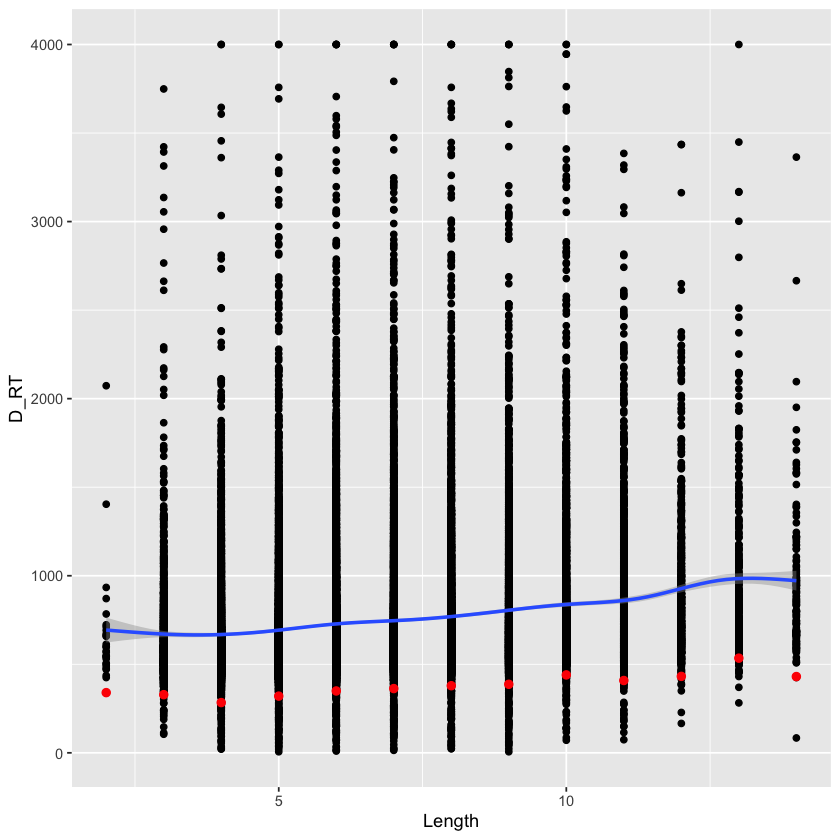

In [13]:
#ggplot for Length
ggplot(filtered_data_all, aes(Length, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”


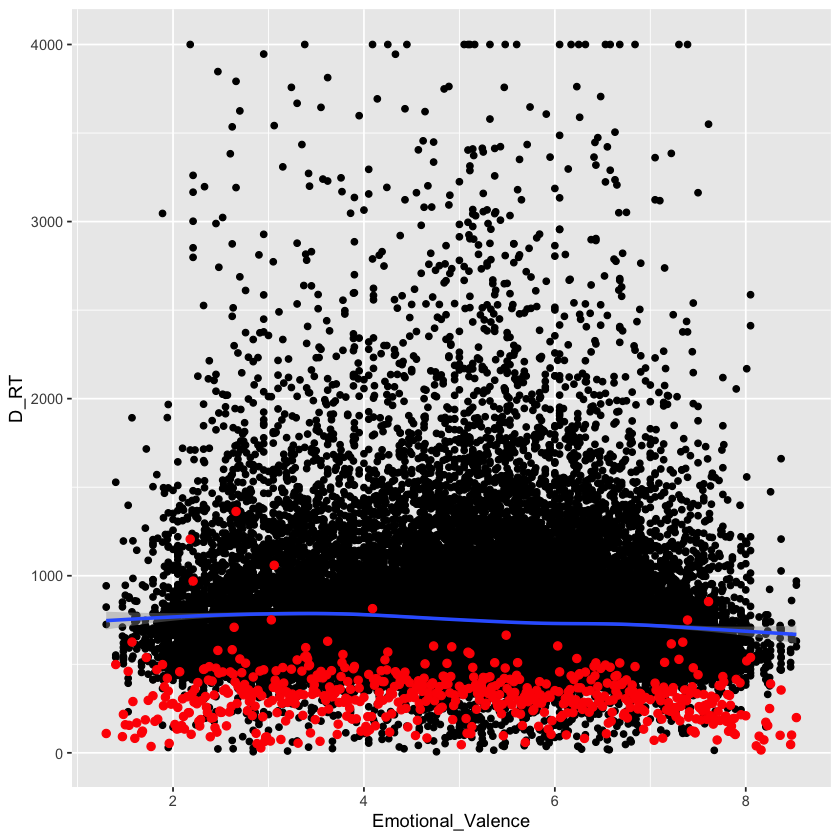

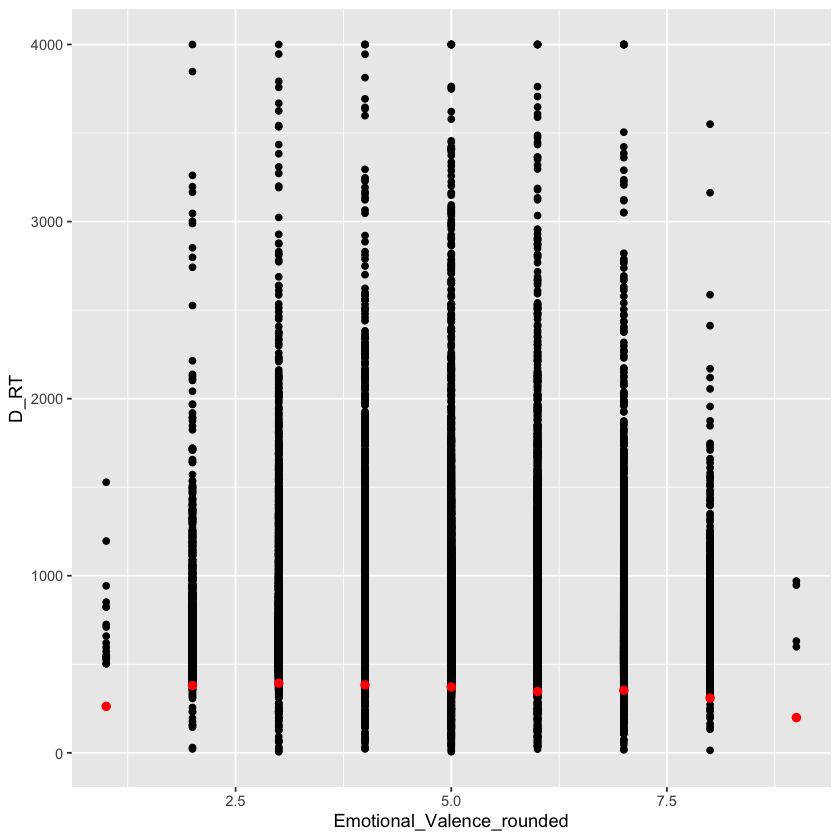

In [56]:
#ggplot for Emotional Valence, before rounded
ggplot(filtered_data_all, aes(Emotional_Valence, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")

#ggplot for Emotional Valence, after rounded
Emotional_Valence_rounded <- round(Emotional_Valence)

ggplot(filtered_data_all, aes(Emotional_Valence_rounded, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Computation failed in `stat_smooth()`:
x has insufficient unique values to support 10 knots: reduce k.”


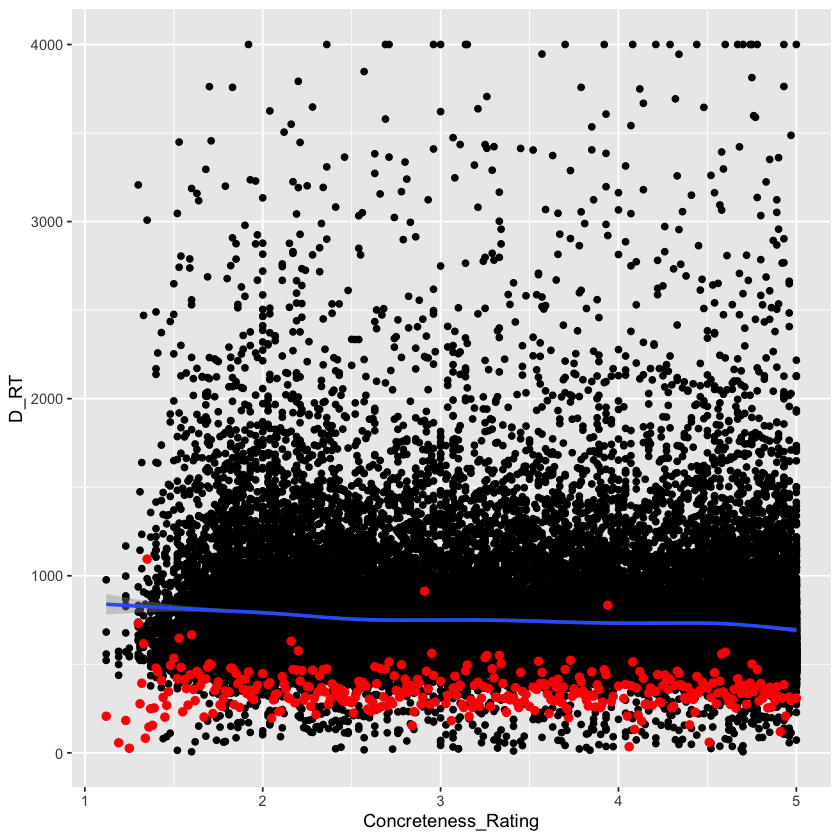

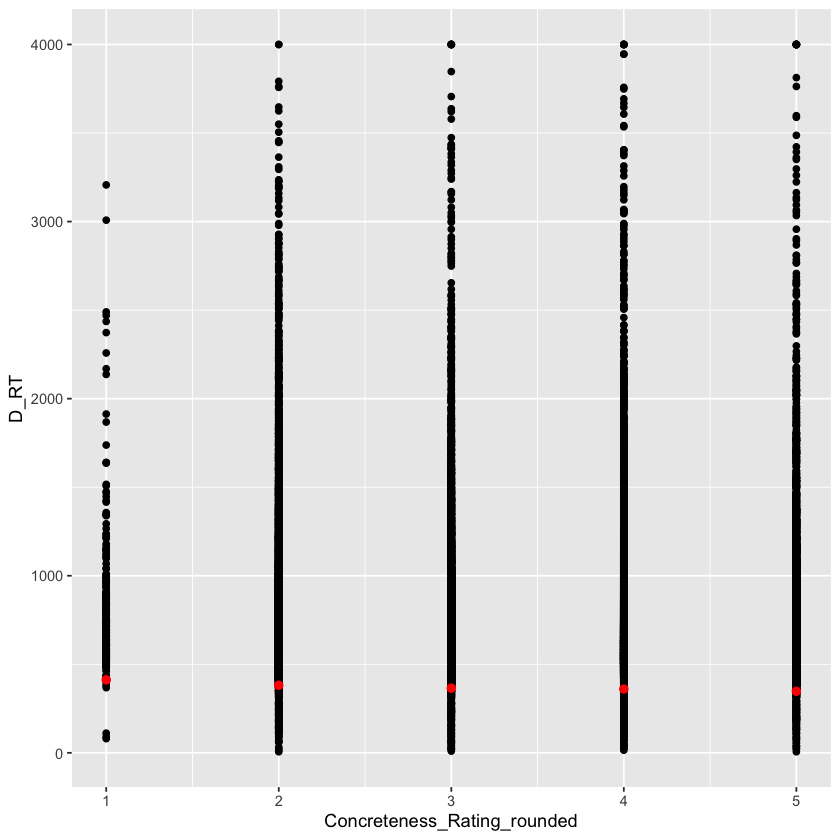

In [57]:
#ggplot for Conreteness, before rounded
ggplot(filtered_data_all, aes(Concreteness_Rating, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")

#ggplot for Conreteness, after rounded
Concreteness_Rating_rounded <- round(Concreteness_Rating)

ggplot(filtered_data_all, aes(Concreteness_Rating_rounded, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



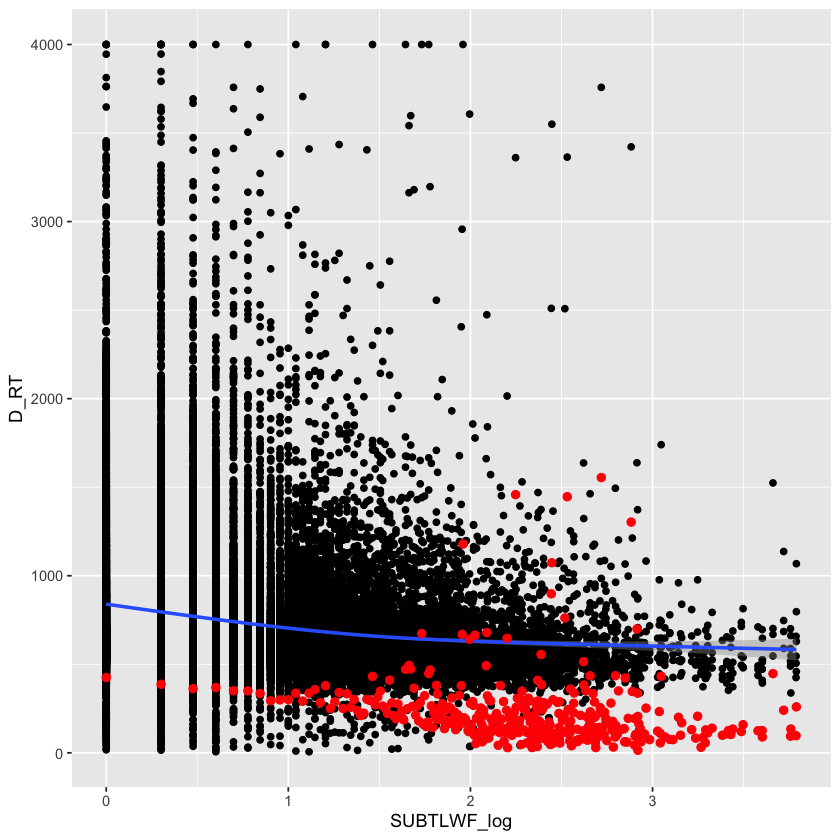

In [58]:
#ggplot for SUBTLWF
SUBTLWF_rounded <- round(SUBTLWF)
SUBTLWF_log <- log10(SUBTLWF_rounded)

ggplot(filtered_data_all, aes(SUBTLWF_log, D_RT)) +
  geom_point() +
  geom_smooth(span = 0.3) + stat_summary(fun.y = "sd", colour = "red", size = 2, geom = "point")


Based on the previous plots, for which of these predictions would a linear regression be a good model of reaction times? Why/why not?

> For the linear model to be a fitting modal we would need to fullfill following characteristics: A linear relation between the two variables, no extreme values, independence of the residuals, no mulitcolinearity, homoscedasticity, and a normal distribution of the residuals. 
Based on the previous plots, we can evaluate more or less for the linear relation based on the blue lines or the alignement of the red points (when calculated for mean). Visually judged, I would say, there is something like linear relation between Reaction time and Length, Reaction time and Emotional Valence and Reaction time and Concreteness. But not for Reaction time with SUBTLWF.
Looking at the existence of extreme values, we have to say, that the plot for Reaction time and Concreteness shows the less extreme values. Again Reaction time and SUBTLWF shows most extreme values. 
To summarize I would say, for Concreteness Rating a linear regression would be a good model of reaction times. For Length and Emotional Valence it would be worth to have a look at the residual.



To what degree are the 4 predictors correlated with each other?

In [59]:
cor(filtered_data_all[2:5])

,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence
Length,1.00000000,-0.14505419,-0.31793980,-0.01753049
SUBTLWF,-0.14505419,1.00000000,-0.03162817,0.07856745
Concreteness_Rating,-0.31793980,-0.03162817,1.00000000,0.07556639
Emotional_Valence,-0.01753049,0.07856745,0.07556639,1.00000000


They correlate rather little. The highes correlation is found between Concreteness_Rating and Length (r = -0.31793980).

#### Part 3: Fit a linear model

Use the `lm` command to fit a linear regression to the `D_RT` variable using the four predictors. Assign the output to a new variable called `ml1`. Use the `summary(ml1)` command to display the output of the model:


In [60]:
ml1 <- lm(Concreteness_Rating_rounded ~ D_RT)
summary(ml1)

ml2 <- lm(Length ~ D_RT)
summary(ml2)

ml3 <- lm(Emotional_Valence_rounded ~ D_RT)
summary(ml3)

ml4 <- lm(SUBTLWF_rounded ~ D_RT)
summary(ml4)


Call:
lm(formula = Concreteness_Rating_rounded ~ D_RT)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5483 -1.3014 -0.3113  0.6431  2.2968 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.566e+00  1.336e-02  266.83   <2e-16 ***
D_RT        -2.156e-04  1.604e-05  -13.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.114 on 35976 degrees of freedom
Multiple R-squared:  0.004993,	Adjusted R-squared:  0.004965 
F-statistic: 180.5 on 1 and 35976 DF,  p-value: < 2.2e-16



Call:
lm(formula = Length ~ D_RT)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0944 -1.6861 -0.2576  1.3754  7.8623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.047e+00  2.684e-02   225.3   <2e-16 ***
D_RT        1.080e-03  3.223e-05    33.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.238 on 35976 degrees of freedom
Multiple R-squared:  0.03025,	Adjusted R-squared:  0.03022 
F-statistic:  1122 on 1 and 35976 DF,  p-value: < 2.2e-16



Call:
lm(formula = Emotional_Valence_rounded ~ D_RT)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2256 -1.1236 -0.1453  0.8239  3.8785 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.338e+00  1.626e-02  328.20   <2e-16 ***
D_RT        -2.230e-04  1.953e-05  -11.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.356 on 35976 degrees of freedom
Multiple R-squared:  0.003611,	Adjusted R-squared:  0.003583 
F-statistic: 130.4 on 1 and 35976 DF,  p-value: < 2.2e-16



Call:
lm(formula = SUBTLWF_rounded ~ D_RT)

Residuals:
   Min     1Q Median     3Q    Max 
 -51.5  -32.5  -27.1  -15.2 6138.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.02673    2.47379  21.435   <2e-16 ***
D_RT        -0.02831    0.00297  -9.531   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.2 on 35976 degrees of freedom
Multiple R-squared:  0.002519,	Adjusted R-squared:  0.002491 
F-statistic: 90.84 on 1 and 35976 DF,  p-value: < 2.2e-16


What is the intercept value and the slope for the word length predictor? Explain what these values means:
> The intercept value is 6.047e+00 (= 6,047), and the slope is 1.080e-03 (= 0,001080). The intercept value is the expected mean value of Reaction time (Y) when all X=0, in our case, when Length would be 0. The function crosses the y-axis at 6.047.
The slope value on the other hand represents the steepness of the function. If the Word Length increases by one, the Reaction time increases by the factor of 0,00108. 

What is the R-squared value? What does this mean?
> The R-squared value is how well the regression model fits the observed data. In our case, an r-squared of 0.03025 reveals that approximately 3% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

As you noticed, the R-squared value is really low. This is because there is a lot of individual differences in how fast people react. These differences cannot be explained by word characteristics. One way to account for individual differences is to summarize the data over participants, and obtain the average RTs for each word. Let's do this and refit the model.

First, use the `group_by` and `summarise` commands to calculate the average RT for each word. In order to keep the word characteristics, include those columns in the `group_by` call. E.g.: `group_by(D_word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence)`. Save the result to a new variable. Use the `heads` command to look at the data:

In [61]:
D_word <- filtered_data_all$Word

In [62]:
summary_data_overparticipants <- filtered_data_all %>% group_by(Word, Length, SUBTLWF, Concreteness_Rating, Emotional_Valence) %>% summarise(RT = mean(D_RT))
head(summary_data_overparticipants)

`summarise()` has grouped output by 'Word', 'Length', 'SUBTLWF', 'Concreteness_Rating'. You can override using the `.groups` argument.



Word,Length,SUBTLWF,Concreteness_Rating,Emotional_Valence,RT
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
abandon,7,8.10,2.54,2.84,1175.5000
abdomen,7,3.35,4.70,5.43,778.6667
abdominal,9,3.41,4.28,4.48,833.4000
abduction,9,3.63,3.07,2.05,708.0000
abide,5,2.71,1.68,5.52,602.2500
ability,7,19.22,1.81,7.00,654.2500


Now, fit the linear model again using the summarised data. Do the estimates of intercept and slope differ much from the previous model? How about the R-squared value? If so, why do you think that is the case?

In [63]:
Length <- summary_data_overparticipants$Length
RT <- summary_data_overparticipants$RT

In [64]:
ml2_new <- lm(Length ~ RT)
summary(ml2_new)


Call:
lm(formula = Length ~ RT)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1792 -1.5928 -0.2175  1.4656  7.5797 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.211238   0.088408   47.63   <2e-16 ***
RT          0.003530   0.000114   30.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.157 on 8708 degrees of freedom
Multiple R-squared:  0.09925,	Adjusted R-squared:  0.09914 
F-statistic: 959.5 on 1 and 8708 DF,  p-value: < 2.2e-16


> The estimates of intercept and slope do differ indeed, although not that much. The intercept value is 4.211238 and the slope value is 0.003530. Comparing to the linear model before (without encounting for participants differences), the R-squared value is around 3 times higher than before: 9.925%. 
Once we used the average RTs per words over the participants, we get a higher percentage of the data fitting the model. This difference might be due to the high dispersion over the participants reaction times. 

Finally, change the predictor for the SUBTLWF to be the log(SUBTLWF) value. Does the R-squared increase? Why/why not?

In [66]:
SUBTLWF_log <- log10(SUBTLWF_rounded)

In [68]:
ml4_new <- lm(SUBTLWF_log ~ D_RT)
summary(ml4_new)


Call:
lm(formula = SUBTLWF_log ~ D_RT)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9546 -0.4599 -0.1314  0.3387  3.1691 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.598e-01  7.484e-03  128.25   <2e-16 ***
D_RT        -3.069e-04  8.987e-06  -34.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.624 on 35976 degrees of freedom
Multiple R-squared:  0.0314,	Adjusted R-squared:  0.03137 
F-statistic:  1166 on 1 and 35976 DF,  p-value: < 2.2e-16


> As I changed the predictor to SUBTLWF_log, the R-squared value increased from 0.002519 to 0.0314.
Usually predictors are logarithmized if they are not normally distributed or contain large differences in the numbers. As we saw on the first plot, this both was the case for SUBTLWF_rounded on Reaction times. Once we logarithmize the values, we are dealing with this problem and we get a higher percentage of the data fitting the linear model.